# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

In [4]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score
def randomly_select_70_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.7*len(x_train)))

def GridSearch(X_train,Y_train,classifier, params, folds):
    trainscores = []
    cvscores  = []    
#     # check this out: https://stackoverflow.com/a/9755548/4084039
#     train_indices = randomly_select_70_percent_indices_in_range_from_1_to_len(x_train)
#     test_indices  = list(set(list(range(1, len(x_train)))) - set(train_indices))
#     # selecting the data points based on the train_indices and test_indices
#     X_train = x_train[train_indices]
#     Y_train = y_train[train_indices]
#     X_test  = x_train[test_indices]
#     Y_test  = y_train[test_indices]
    
    # Calculating Fold size
    fold_size = len(X_train)//folds
#     X_train_folds = dict()
#     Y_train_folds = dict()
    
#     #
#     for j in range((len(X_train) + fold_size - 1) // fold_size ):
#         X_train_folds[j] = X_train[j*fold_size:(j+1)*fold_size]
#         Y_train_folds[j] = Y_train[j*fold_size:(j+1)*fold_size]
    
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        cvscores_folds  = []
        
        for j in range(0, folds):
            
            # Calculating start and end index of Crovalidation train fold
            f_start = j*fold_size
            f_end = (j+1)*fold_size
            
# Instead of creating dict for fold,
# We are just slicing the Numpy array and concating the remaining array using np.concatenate, If fold selected is not last fold
            
            if f_end < len(X_train):
                Xf_test = X_train[f_start:f_end]
                Yf_test = Y_train[f_start:f_end]
                
                Xf_train = np.concatenate((X_train[:f_start],X_train[f_end:]),axis = 0)
                Yf_train = np.concatenate((Y_train[:f_start],Y_train[f_end:]),axis = 0)
            else:
                Xf_test = X_train[f_start:]
                Yf_test = Y_train[f_start:]
                
                Xf_train = X_train[:f_start]
                Yf_train = Y_train[:f_start]
            
            classifier.n_neighbors = k
            classifier.fit(Xf_train,Yf_train)

            Y_predicted = classifier.predict(Xf_test)
            cvscores_folds.append(accuracy_score(Yf_test, Y_predicted))

            Y_predicted = classifier.predict(Xf_train)
            trainscores_folds.append(accuracy_score(Yf_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(cvscores_folds)))
    return trainscores,cvscores

In [5]:
def rand10(rng,k):
    return random.sample(range(rng[0],rng[1]+1),k)

{'n_neighbors': [6, 7, 9, 23, 37, 52, 64, 82, 83, 100]}


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


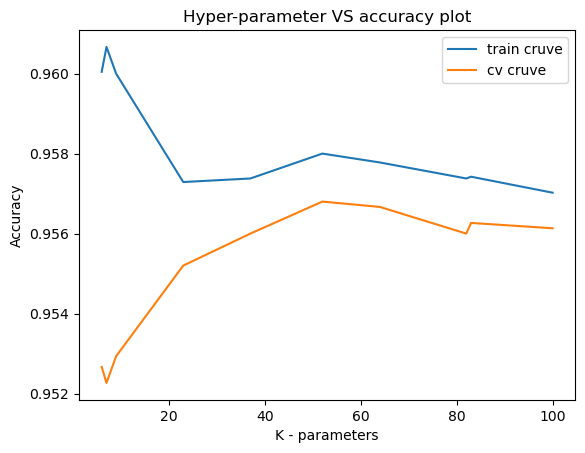

In [6]:

neigh = KNeighborsClassifier()
# a = 1
# b = 35
lst = sorted(rand10((1,100),10),reverse=False)
params = {'n_neighbors':lst} # gives dict with list of 10 random elements btw a,b
folds = 4 # number of folds

print(params)

trainscores,testscores = GridSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("K - parameters")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

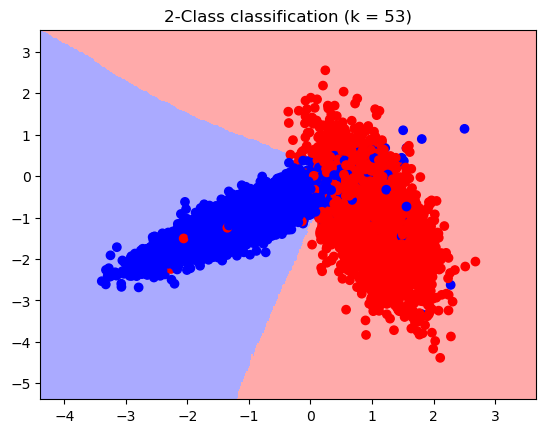

In [8]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# colors = {0:'red', 1:'blue'}
# plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
# plt.show()

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 53)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)